#<b>Milestone 2

###<b> Mounting the Drive

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###<b>Loading libraries</b>

In [ ]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

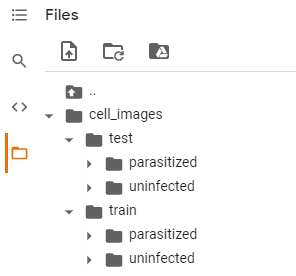

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b>Normalize the images

In [ ]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
#train_images = (___________).astype('float32')
#test_images = (______________).astype('float32')

train_images = (train_images/255.0).astype('float32')
test_images = (test_images/255.0).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
train_labels=to_categorical(train_labels,2)
# Similarly let us try to encode test labels
test_labels=to_categorical(test_labels,2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

####<b> Importing the required libraries

In [ ]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the model

In [ ]:
#creating sequential model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and train our Model

In [ ]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history=model.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 16s 7ms/step - loss: 0.4373 - accuracy: 0.7916 - val_loss: 0.2528 - val_accuracy: 0.8980
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1274 - accuracy: 0.9534 - val_loss: 0.1228 - val_accuracy: 0.9806
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0942 - accuracy: 0.9686 - val_loss: 0.0778 - val_accuracy: 0.9828
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0839 - accuracy: 0.9721 - val_loss: 0.0654 - val_accuracy: 0.9866
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0758 - accuracy: 0.9751 - val_loss: 0.0456 - val_accuracy: 0.9900
Epoch 6/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0739 - accuracy: 0.9757 - val_loss: 0.0840 - val_accuracy: 0.9790
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0690 - accuracy: 0.9770 - val_loss: 0.0756 - val_accuracy: 0.9800


####<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9819

 Test_Accuracy:- 0.9819231033325195


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



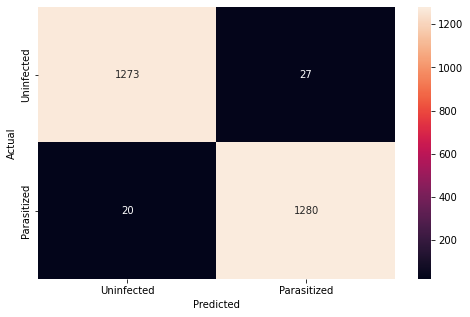

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

In [ ]:
# function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

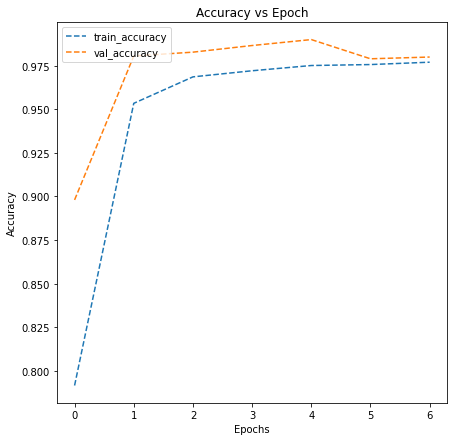

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:
#creating sequential model
#model1=Sequential()

# Build the model here
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))


model1.add(Flatten())

model1.add(Dense(512,activation="relu"))
model1.add(Dropout(0.4))
model1.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model1.summary()

#model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [ ]:
#model1.compile(loss=__________, optimizer=_______, metrics=['accuracy'])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
#history1=model1.fit(_____________,__________,batch_size=______,callbacks=callbacks,  validation_split=______,epochs=______,verbose=1)
history1=model1.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)


Epoch 1/20
624/624 [==============================] - 5s 7ms/step - loss: 0.4265 - accuracy: 0.7979 - val_loss: 0.2207 - val_accuracy: 0.8764
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1275 - accuracy: 0.9496 - val_loss: 0.1438 - val_accuracy: 0.9523
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1102 - accuracy: 0.9624 - val_loss: 0.1209 - val_accuracy: 0.9742
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0931 - accuracy: 0.9709 - val_loss: 0.0715 - val_accuracy: 0.9904
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0789 - accuracy: 0.9753 - val_loss: 0.0658 - val_accuracy: 0.9874
Epoch 6/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0740 - accuracy: 0.9742 - val_loss: 0.0847 - val_accuracy: 0.9792
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0688 - accuracy: 0.9776 - val_loss: 0.0883 - val_accuracy: 0.9770


####<b> Evaluating the model

In [ ]:
#accuracy1 = model1.evaluate(_________, _____________, verbose=1)
#print('\n', 'Test_Accuracy:-', accuracy1[1])

accuracy1 = model1.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 7ms/step - loss: 0.0658 - accuracy: 0.9827

 Test_Accuracy:- 0.9819231033325195


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



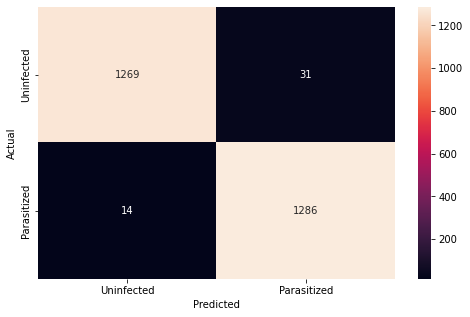

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the Train and validation curves

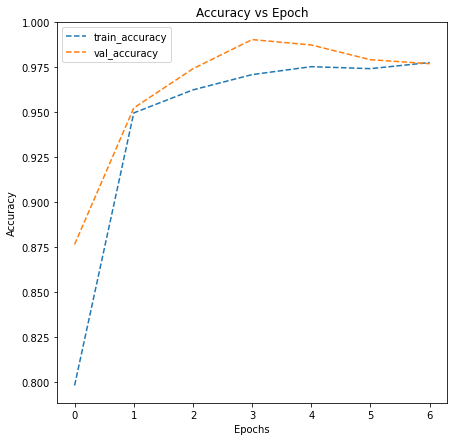

In [ ]:
plot_accuracy(history1)

In this plot accuracy, Here we can clearly observe that the training and valiation accuracy are increasing.

And we can also notice that validation accuracy is slightly higher than the train accuracy

####<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:
###
#model2 = Sequential()
#model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same'))

#'''

#Complete this model using BatchNormalization layers and by using LeakyRelu as the activation function


#'''
#model2.add(BatchNormalization())
#model2.add(LeakyReLU())
#adam = optimizers.Adam(learning_rate=0.001)

#model2.summary()

The second step of model2 was built by modifying the activation function of the function to LeakyRelu.

I don't think that a  better performance was achieved with the LeakyRelu activation function. i will review the performance of the model as i move on in this process.


In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same'))
model2.add(LeakyReLU(0.1))
model2.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model2.add(LeakyReLU(0.1))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model2.add(LeakyReLU(0.1))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model2.add(LeakyReLU(0.1))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(32))
model2.add(LeakyReLU(0.1))
model2.add(Dropout(0.2))
model2.add(Dense(2, activation='softmax'))
adam = optimizers.Adam(learning_rate = 0.001)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                          

Building a model with LeakyRelu as the activation function

Building the Model

####<b>Compiling the model

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
'''

create the callbacks similarly as done in the base model
As callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve

'''

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 6s 9ms/step - loss: 0.3126 - accuracy: 0.8686 - val_loss: 0.0502 - val_accuracy: 0.9832
Epoch 2/20
624/624 [==============================] - 5s 9ms/step - loss: 0.1099 - accuracy: 0.9643 - val_loss: 0.0347 - val_accuracy: 0.9908
Epoch 3/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0957 - accuracy: 0.9712 - val_loss: 0.0559 - val_accuracy: 0.9860
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0739 - accuracy: 0.9770 - val_loss: 0.0413 - val_accuracy: 0.9880


<b>Plotting the train and validation accuracy

####<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy
accuracy = model2.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])



82/82 [==============================] - 1s 5ms/step - loss: 0.0625 - accuracy: 0.9835

 Test_Accuracy:- 0.9834615588188171


Evaluation of the model
The model isn't performing greatly even if the accuracy is about 97.5 percent. I should be more observant of how the model is performing as i change my parameters. I'm also worried about over fitting of the data if that is a likely possibility.

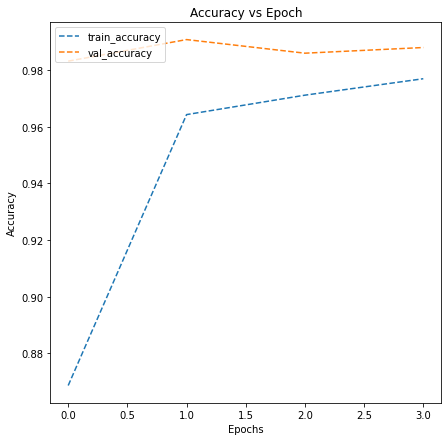

In [ ]:
# plotting the accuracies
plot_accuracy(history2)

<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



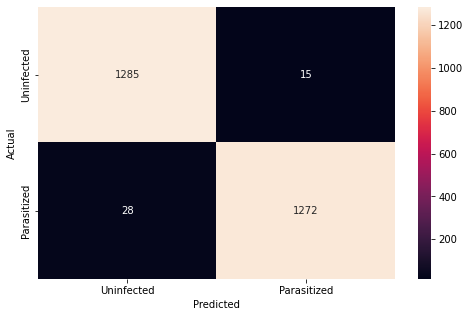

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images

train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                  zoom_range = 0.5, rotation_range=30)
val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = train_images, y = train_labels, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= train_images, y = train_labels, batch_size=64, seed=42, shuffle=True)

####**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

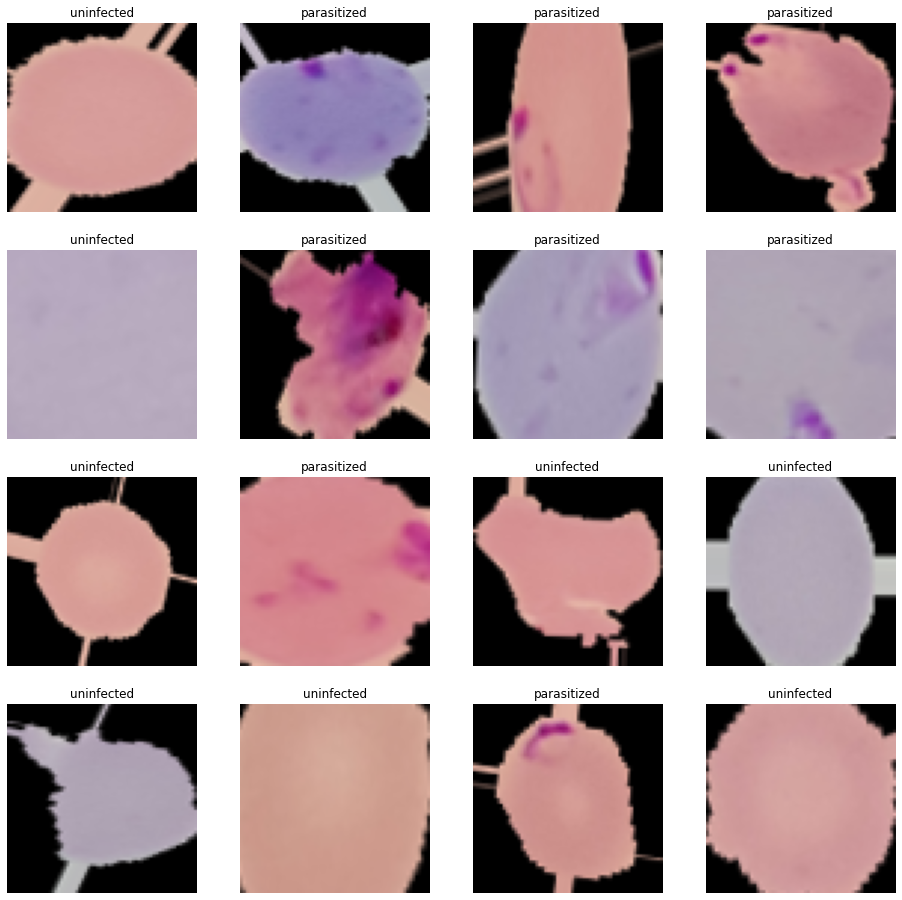

In [ ]:
#Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

#Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

#####<b>Observations and insights: ____
The importance of the image data generator as we can see from the above is that It would allow me to augment my images in real-time while my model is still training! I can apply any random transformations on each training image as it is passed to the model. This will not only make my model robust but will also save up on the overhead memory!
Therefore from the above, we can see that the plot of the image show distict parasitized cells from uninfected cells.

####<b>Building the Model

In [ ]:
model3 = Sequential()

# Build the model here

model3=Sequential()
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))


model3.add(Flatten())

model3.add(Dense(512,activation="relu"))
model3.add(Dropout(0.4))
model3.add(Dense(2,activation="softmax"))#2 represent output layer neurons


# use this as the optimizer
adam = optimizers.Adam(learning_rate=0.001)

model3.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])
model3.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)       

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=32,callbacks=callbacks,
                                  epochs=20,verbose=1)

Epoch 1/20
390/390 [==============================] - 28s 71ms/step - loss: 0.5246 - accuracy: 0.7231 - val_loss: 0.1423 - val_accuracy: 0.9522
Epoch 2/20
390/390 [==============================] - 27s 69ms/step - loss: 0.2128 - accuracy: 0.9190 - val_loss: 0.1559 - val_accuracy: 0.9517
Epoch 3/20
390/390 [==============================] - 27s 68ms/step - loss: 0.1869 - accuracy: 0.9332 - val_loss: 0.1066 - val_accuracy: 0.9674
Epoch 4/20
390/390 [==============================] - 27s 68ms/step - loss: 0.1726 - accuracy: 0.9411 - val_loss: 0.0925 - val_accuracy: 0.9741
Epoch 5/20
390/390 [==============================] - 27s 68ms/step - loss: 0.1649 - accuracy: 0.9454 - val_loss: 0.0941 - val_accuracy: 0.9673
Epoch 6/20
390/390 [==============================] - 26s 68ms/step - loss: 0.1524 - accuracy: 0.9498 - val_loss: 0.0776 - val_accuracy: 0.9746
Epoch 7/20
390/390 [==============================] - 27s 68ms/step - loss: 0.1465 - accuracy: 0.9508 - val_loss: 0.0689 - val_accuracy:

####<B>Evaluating the model

<b>Plot the train and validation accuracy

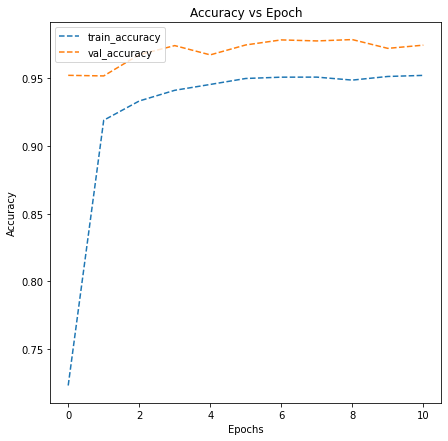

In [ ]:
# plotting the accuracies
plot_accuracy(history3)


In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0941 - accuracy: 0.9669

 Test_Accuracy:- 0.9669230580329895


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1300
           1       0.98      0.95      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



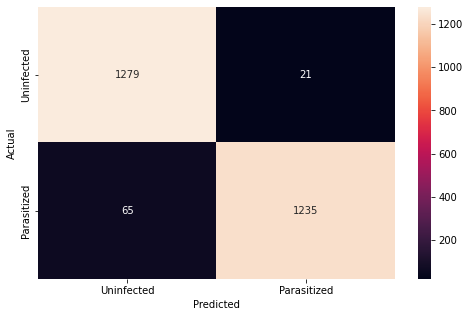

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Now let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))
vgg.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable=False

# Add classification layers on top of it  
 
x = Flatten()(transfer_layer.output) #Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons

x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)

model4 = Model(vgg.input, pred) #Initializing the model

####<b>Compiling the model

In [ ]:
# Compiling the model 

# use this as the optimizer
adam = optimizers.Adam(learning_rate=0.001)

model4.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])
model4.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
#Fitting the model and running the model for 10 epochs
history4 = model4.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=32,callbacks=callbacks,
                                  epochs=10,verbose=1)

Epoch 1/10
390/390 [==============================] - 37s 91ms/step - loss: 0.3552 - accuracy: 0.8507 - val_loss: 0.2365 - val_accuracy: 0.9109
Epoch 2/10
390/390 [==============================] - 34s 86ms/step - loss: 0.3026 - accuracy: 0.8745 - val_loss: 0.2403 - val_accuracy: 0.9164
Epoch 3/10
390/390 [==============================] - 34s 86ms/step - loss: 0.2989 - accuracy: 0.8747 - val_loss: 0.1855 - val_accuracy: 0.9272
Epoch 4/10
390/390 [==============================] - 33s 86ms/step - loss: 0.2871 - accuracy: 0.8799 - val_loss: 0.1889 - val_accuracy: 0.9322
Epoch 5/10
390/390 [==============================] - 33s 86ms/step - loss: 0.2960 - accuracy: 0.8779 - val_loss: 0.1883 - val_accuracy: 0.9324


<b>Plot the train and validation accuracy

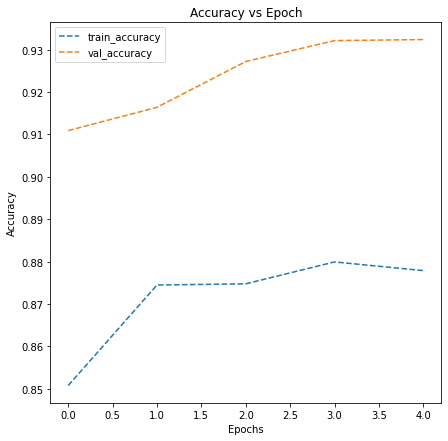

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

#####**Observations and insights: _____**

*   What can be observed from the validation and train curves?

Here we can clearly observe that the training and valiation accuracy are increasing
And we can also notice that validation accuracy is greatly higher than the train accuracy

####<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 1s 12ms/step - loss: 0.1972 - accuracy: 0.9358

 Test_Accuracy:- 0.935769259929657


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1300
           1       0.95      0.92      0.93      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



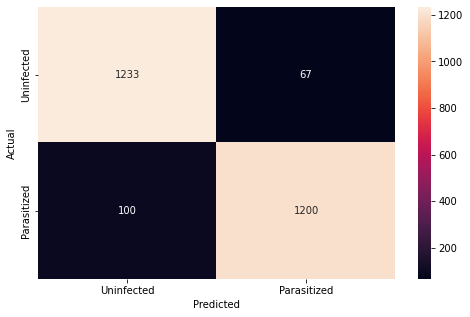

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
The confusion matrix didn't really show a better results compared to the model3 from data augumentation. The precision is about 0.97 for cells that are parasitized and 0.91 for recall. The f1 score for both uninfected cells and parasitized cells are 0.94.

The test accuracy was found to be 0.94

*  Choose the model with the best accuracy scores from all the above models and save it as a final model.
I think the model3 with data augumentation had the best model results: These are my observations and conclusions

Although the first model1 with the Relu activation gave a test accuracy of 0.98 and the validation accuracy is slightly higher than the training accuracy of the base model. I don’t want to completely agree that this model is the best due to some overfitting errors.

The VGG-16 could be a good choice of solution design. The test accuracy was found to be 0.94.

However, the limitation of the VGG-16 transfer learning is the computational time of modelling the data.



###<b> Observations and Conclusions drawn from the final model: _____
I think that building the models have shown several insights to how the data is being analyzed. 

The Base Model of the data sets, the test and train images were normalized, followed by one-hot encoding on the train and test labels. The test accuracy of the base model was found to be 0.977 and, on the plot, we could clearly observe that the training and validation accuracy is increasing. And we can also notice that validation accuracy is slightly higher than the train accuracy.


The first model1 with addition of new layers and the Relu activation gave a test accuracy of 0.98. The precision, recall, and f1 score was 0.99, 0.98, and 0.98 respectively. Also, the training and validation accuracy was found to be increasing where the validation accuracy is slightly higher than the train accuracy.


The model2 with a Leaky Relu as the activation model and check if Batch Normalization will improve the performance of the model. The test accuracy results of 0.97 were lower compared to the previous model. The confusion matrix also revealed slightly poorer values.


The third model3 was performed with data augmentation. This model was performed using the image data generator. This process allowed me to augment my images in real-time while my model was still training. However, the test accuracy of 0.97 was seen and was shown to be very low. The confusion matrix revealed that the precision, recall, and f1 score was very low compared to the previous models.

Prior to analyzing model4, we tried to use a pre-trained model like VGG-16 to check how is performs on our data. The pre-trained model of VGG-16 which is also a type of transfer learning model was performed. The VGG-16 is a convolutional neural network that is 16 layers deep. 

The VGG-16 pre-trained model was found to have a test accuracy of 0.94. 

However, the limitation of the VGG-16 transfer learning is the computational time of modeling the data.



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?

I believe the model performance can be improved using other pre-trained models. It is not impossible to try out other CNN architectures as well by varying different neurons and hyper parameters. But i would think that the performance of the pre-trained models would be more reliable.

*  You can try to build a model using these HSV images and compare them with your other models.

In the below model, I tried the HSV images and compared the results with my model. I think the HSV helped with cleaning the images and removing the background. The conversion of the RGB to HSV of Images using OpenCV showed a better and clearer vision in the test data.

I have also read that the reason we use HSV color space for color detection/thresholding over RGB/BGR is that HSV is more robust towards external lighting changes. This means that in cases of minor changes in external lighting (such as pale shadows.) Hue values vary relatively lesser than RGB values.


I think the transfer learning model is still the most relaible model

Pre-trained model (VGG19) - I'm applying the VGG19 as an additional model to compare my results with the VGG 16 and other models.

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Model

vgg = VGG19(include_top=False, weights='imagenet', input_shape=(64,64,3))
vgg.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable=False

# Add classification layers on top of it  
 
x = Flatten()(transfer_layer.output) #Flatten the output from the 3rd block of the VGG19 model
x = Dense(256, activation='relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons

x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)

model5 = Model(vgg.input, pred) #Initializing the model

Compiling the model

In [ ]:
# Compiling the model 

# use this as the optimizer
adam = optimizers.Adam(learning_rate=0.001)

model5.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])
model5.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

Using Callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

Fit and Train the Model 

In [ ]:
#Fitting the model and running the model for 10 epochs
history5 = model5.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=32,callbacks=callbacks,
                                  epochs=10,verbose=1)

Epoch 1/10
390/390 [==============================] - 37s 91ms/step - loss: 0.3897 - accuracy: 0.8298 - val_loss: 0.2730 - val_accuracy: 0.8913
Epoch 2/10
390/390 [==============================] - 36s 93ms/step - loss: 0.3477 - accuracy: 0.8501 - val_loss: 0.2445 - val_accuracy: 0.9201
Epoch 3/10
390/390 [==============================] - 35s 91ms/step - loss: 0.3403 - accuracy: 0.8544 - val_loss: 0.2481 - val_accuracy: 0.8983
Epoch 4/10
390/390 [==============================] - 35s 90ms/step - loss: 0.3394 - accuracy: 0.8560 - val_loss: 0.2548 - val_accuracy: 0.9055


Plot train and validation accuracy

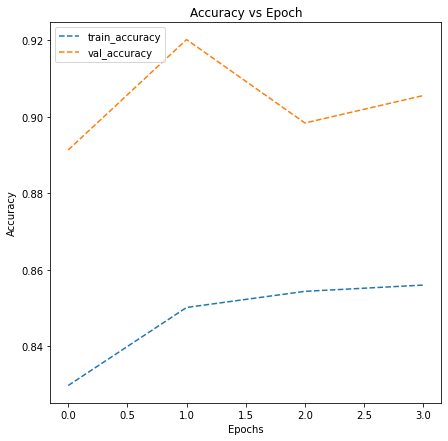

In [ ]:
# plotting the accuracies
plot_accuracy(history5)

Evaluating the model

In [ ]:
# Evaluating the model on test data
# Evaluating the model on test data
accuracy5 = model5.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy5[1])

82/82 [==============================] - 1s 14ms/step - loss: 0.2531 - accuracy: 0.9154

 Test_Accuracy:- 0.9153845906257629


Plotting Classification report and confusion matrix


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1300
           1       0.98      0.85      0.91      1300

    accuracy                           0.92      2600
   macro avg       0.92      0.92      0.92      2600
weighted avg       0.92      0.92      0.92      2600



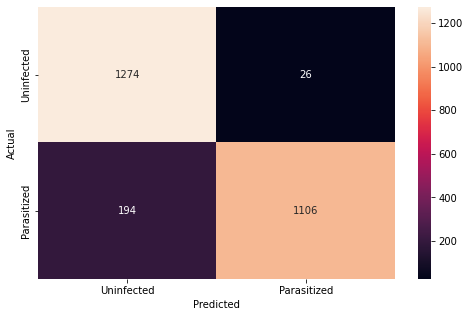

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model5.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The test accuracy of the model5 is 0.915 and the confusion matrix showed that there are 0.87 precision, 0.98 recall, and 0.92 f1 score for uninfected cells while there are 0.98 for precision, 0.85 for recall and 0.91 for the f1 score.
The recall was really low and one imporatant thing i would love to note is that i would need a model that would improve the False Negative (FN). I wouldn't want a situation where i will inaccurately predict that a cell is not infected but it's actually infected. This can lead to mortality.

Trying to build a model using the HSV images and comparing the results with my models 

In [ ]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [ ]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


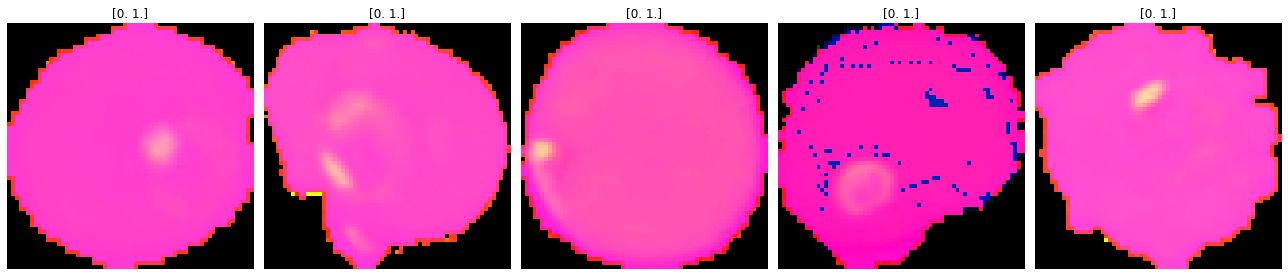

In [ ]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

# Similarly i can visualize for the images in the test data

In [ ]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(test_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


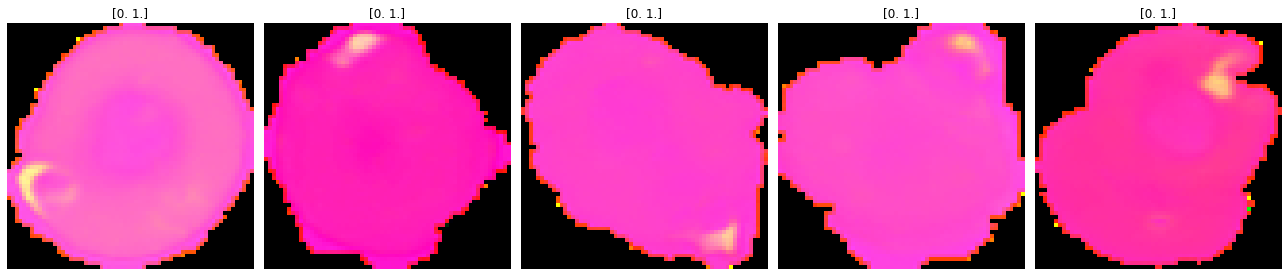

In [ ]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

I could also try the gaussian Blurring to see how the model on both train and test data to see how the model differs

Gaussian Blurring to see how the model on train data

In [ ]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

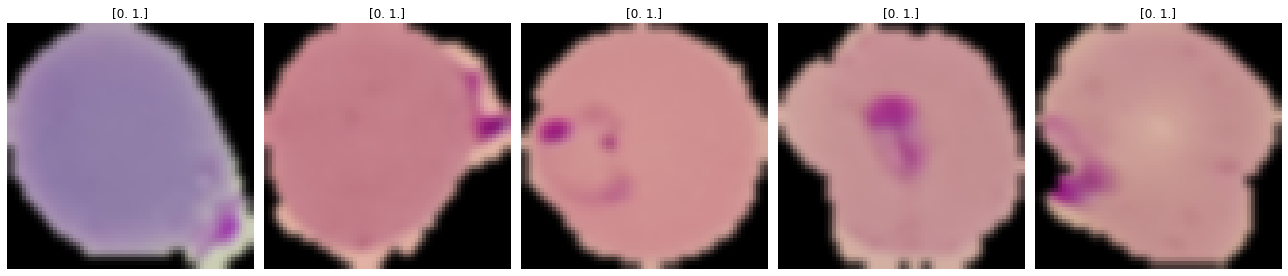

In [ ]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

Gaussian Blurring to see how the model on test data

In [ ]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

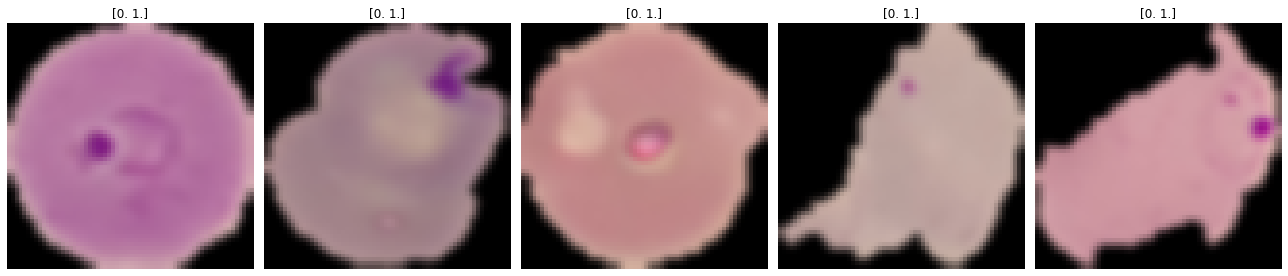

In [ ]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

I'm not sure if blurring, in this case, would really make so much difference or help us in a great way. It is often used to remove Gaussian (i. e., random) noise from the image. I'm not sure if these results have removed all the random noise from the image. It is looking better in the test data compared to the train data. I understand that Gaussian blurring is commonly used when reducing the size of an image. When down sampling an image, it is common to apply a low-pass filter to the image prior to resampling. This is to ensure that spurious high-frequency information does not appear in the down sampled image (aliasing). Therefore, i think the model3 with data augumentation is a great option. However, the VGG-16 is a great option of technique that could be adopted.


I could propose a combination test of the VGG-16 and data augmentation as a choice of solution design. However, the limitation of the VGG-16 transfer learning is the computational time of modeling the data.

I built the VGG-19 model and conpared it with the previous models. I realized that the VGG-19 also didn't perform better when compared to the VGG-16


However, the limitation of the VGG-16 transfer learning is the computational time of modeling the data. Actually, there are two major drawbacks with VGGNet: It is painfully slow to train. The network architecture weights themselves are quite large (concerning disk/bandwidth).


### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?